# 程序说明
- cv2读取的img是[height, width, channels]
- jupyter按`ESC`后按`h`获取快捷键说明
- `shift`+ `l` 行标
- 其中前两个参数为人体框左上角点的坐标值，后两个参数为人体框右下角点的坐标值。(x,y)

In [2]:
import pickle as pk
import pandas as pd

In [3]:
anno = pd.read_json('../demo_data/keypoint_train_annotations_20170909.json')

In [4]:
anno.drop(['url'], axis=1, inplace=True)

In [5]:
import cv2 
import numpy as np

## 先对原始的.json文件处理,使其能在长和宽维度上扩大30%,从而获得新的框的坐标

In [6]:
img_wh = []
for img in anno.image_id:
    path = '/media/bnrc2/_backup/ai/ai_challenger_keypoint_train_20170902/keypoint_train_images_20170902/{}.jpg'.format(img)
    img_np = cv2.imread(path)
    img_wh.append(np.shape(img_np)[:2])

In [7]:
anno['image_height_width'] = img_wh

In [24]:
anno

,human_annotations,image_id,keypoint_annotations,image_height_width
0,"{'human2': [374, 238, 572, 743], 'human1': [13...",5f9ab0e1b59cb27de8adf0255a3730536ed87b07,"{'human2': [430, 370, 1, 400, 444, 1, 474, 451...","(1000, 749)"
1,"{'human3': [580, 49, 941, 593], 'human2': [395...",8f2b73eda5bc107b58761be170ea669732af57f2,"{'human3': [722, 155, 1, 682, 178, 1, 622, 189...","(690, 1000)"
10,"{'human2': [264, 67, 390, 355], 'human1': [327...",44ccfe343f594896c82b1e50438219744ccbab88,"{'human2': [354, 115, 1, 366, 148, 1, 374, 176...","(356, 530)"
100,"{'human1': [181, 151, 467, 886]}",e2ff8b814590cf92777cb20bf4c788e54754a6fa,"{'human1': [257, 303, 1, 201, 402, 1, 230, 503...","(939, 633)"
101,"{'human2': [532, 48, 706, 666], 'human1': [349...",edad47c66307b56bd24c87982bcb408df0ad91af,"{'human2': [616, 183, 2, 602, 291, 2, 561, 222...","(667, 1000)"
102,"{'human4': [501, 245, 585, 497], 'human3': [27...",09a244a6ee20766f226c0f030ffef7a89a9c2f17,"{'human4': [568, 295, 1, 556, 316, 2, 537, 293...","(517, 690)"
103,"{'human2': [157, 152, 329, 284], 'human1': [12...",3af84f31379fcce70dacb65aca44f298b624ab2c,"{'human2': [275, 191, 1, 256, 200, 1, 235, 206...","(413, 550)"
104,"{'human1': [653, 116, 779, 651]}",62151d25e5caa2bccb1b571a5a6cf371369028b4,"{'human1': [683, 249, 1, 676, 175, 1, 731, 140...","(666, 1000)"
105,"{'human3': [608, 102, 886, 441], 'human2': [21...",7aeec8e64afd04c23c4988a647a851a3e7d52ccb,"{'human3': [670, 290, 1, 683, 395, 1, 803, 381...","(626, 940)"
106,"{'human2': [218, 133, 460, 742], 'human1': [44...",2bd9db0a2599ba6ca8c3351c471a29e24c36af3e,"{'human2': [263, 310, 1, 266, 435, 1, 317, 523...","(750, 500)"


In [10]:
new_coords = []
for i in range(anno.shape[0]):
    h, w = anno.image_height_width[i]
    d = {}
    for k, v in anno.human_annotations[i].items():
        coords = np.array(v).reshape(-1, 2)
        offset = (coords[1] - coords[0]) * 0.15  #沿着长和宽扩大30%
        offset = np.concatenate((-offset, offset))
        coords = v + offset
        coords = coords.astype('int')
        coords[np.where(coords<0)] = 0
        if coords[2] < w:
            coords[2] = w
        if coords[3] < h:
            coords[3] = h
        d[k] = coords
    new_coords.append(d)
anno.human_annotations = new_coords
#         new_coords.append(coords)
#         h, w = anno.image_height_width[i]
#         hw.append((w, h))

,human_annotations,image_id,keypoint_annotations,image_height_width
0,"{'human2': [344, 162, 749, 1000], 'human1': [9...",5f9ab0e1b59cb27de8adf0255a3730536ed87b07,"{'human2': [430, 370, 1, 400, 444, 1, 474, 451...","(1000, 749)"
1,"{'human3': [525, 0, 1000, 690], 'human2': [335...",8f2b73eda5bc107b58761be170ea669732af57f2,"{'human3': [722, 155, 1, 682, 178, 1, 622, 189...","(690, 1000)"
10,"{'human3': [148, 0, 940, 711], 'human2': [0, 0...",44ccfe343f594896c82b1e50438219744ccbab88,"{'human2': [354, 115, 1, 366, 148, 1, 374, 176...","(356, 530)"
100,"{'human4': [367, 0, 570, 853], 'human3': [426,...",e2ff8b814590cf92777cb20bf4c788e54754a6fa,"{'human1': [257, 303, 1, 201, 402, 1, 230, 503...","(939, 633)"
101,"{'human1': [193, 0, 939, 705]}",edad47c66307b56bd24c87982bcb408df0ad91af,"{'human2': [616, 183, 2, 602, 291, 2, 561, 222...","(667, 1000)"
102,"{'human1': [56, 18, 743, 1000]}",09a244a6ee20766f226c0f030ffef7a89a9c2f17,"{'human4': [568, 295, 1, 556, 316, 2, 537, 293...","(517, 690)"
103,"{'human3': [396, 82, 666, 1000], 'human2': [30...",3af84f31379fcce70dacb65aca44f298b624ab2c,"{'human2': [275, 191, 1, 256, 200, 1, 235, 206...","(413, 550)"
104,"{'human2': [0, 91, 641, 710], 'human1': [0, 15...",62151d25e5caa2bccb1b571a5a6cf371369028b4,"{'human1': [683, 249, 1, 676, 175, 1, 731, 140...","(666, 1000)"
105,"{'human8': [448, 86, 615, 460], 'human7': [513...",7aeec8e64afd04c23c4988a647a851a3e7d52ccb,"{'human3': [670, 290, 1, 683, 395, 1, 803, 381...","(626, 940)"
106,"{'human1': [0, 0, 784, 894]}",2bd9db0a2599ba6ca8c3351c471a29e24c36af3e,"{'human2': [263, 310, 1, 266, 435, 1, 317, 523...","(750, 500)"


In [85]:
new_coords = np.array(new_coords)
hw = np.array(hw)

for c in range(2):
    np.clip(new_coords[:, c+2], a_min=None, a_max=hw[:, c], out=new_coords[:, c+2])

new_coords[np.where(new_coords<0)] = 0.0

In [19]:
%matplotlib inline
import skimage.io as io

In [35]:
from matplotlib import pyplot as plt

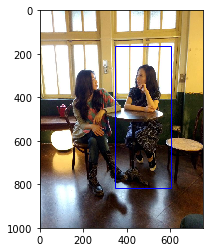

In [63]:
currentAxis = plt.gca()
coord = [ 344.3, 162.25, 601.7, 818.75]
c = np.array((coord[0], coord[1]))
# print(c)
h = coord[3]-coord[1]
w = coord[2]-coord[0]
coords = c, w, h
img = io.imread('/media/bnrc2/_backup/ai/ai_challenger_keypoint_train_20170902/keypoint_train_images_20170902/5f9ab0e1b59cb27de8adf0255a3730536ed87b07.jpg')
plt.imshow(img)
currentAxis.add_patch(plt.Rectangle(*coords, fill=False, edgecolor='blue', linewidth=1))

In [104]:
import sys

In [105]:
sys.executable

'/home/bnrc2/anaconda3/bin/python3'